In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
chen = Sampler()

In [3]:
sample = chen.get_samples(size=100)
sample = chen.get_samples(size=1000, pristine=True)
sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
columns = "tau t_trun tau_trun t_burst t_ext".split()
sample[columns] = sample[columns].apply(log10)
sample.head(n=10)

,t_form,gamma,tau,truncated,t_trun,tau_trun,t_burst,t_ext,A,Z,tau_V,mu_V,sigma_v
0,6.544704e+09,0.225516,9.646823,False,NaN,NaN,8.612062,8.034822,0.033243,1.205368,1.089794,0.052263,244.788564
1,6.531208e+09,0.921347,9.035577,False,NaN,NaN,9.805800,7.951543,0.064971,1.773105,0.004121,0.096010,186.237767
2,1.311338e+10,0.533179,9.273127,False,NaN,NaN,9.942653,7.609749,0.225105,2.070121,1.642454,0.114917,208.510799
3,1.281560e+10,0.414057,9.382940,False,NaN,NaN,10.048128,8.141818,3.273981,0.637815,1.361564,0.281675,327.818398
4,9.078121e+09,0.511643,9.291033,False,NaN,NaN,9.327102,8.158260,0.041759,1.464180,1.818684,0.593257,266.086126
5,8.370146e+09,0.364103,9.438776,False,NaN,NaN,9.837474,8.308307,0.954214,2.197392,1.242771,0.156758,253.227909
6,9.191053e+09,0.506901,9.295077,True,10.134130,7.775539,9.369830,8.476176,0.733035,0.226169,0.874847,0.560754,167.130285
7,1.682873e+09,0.012655,10.897739,True,9.885547,8.507679,9.266266,8.414201,0.939773,0.935071,0.316561,0.273482,265.688859
8,2.609396e+09,0.878272,9.056371,False,NaN,NaN,9.409329,8.375325,2.381761,1.717945,1.468104,0.408134,229.384031
9,1.272003e+10,0.630520,9.200301,False,NaN,NaN,10.008022,7.579301,1.290360,0.870988,2.003893,0.295688,196.307492


/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'griddsize', 'label'
  s)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages

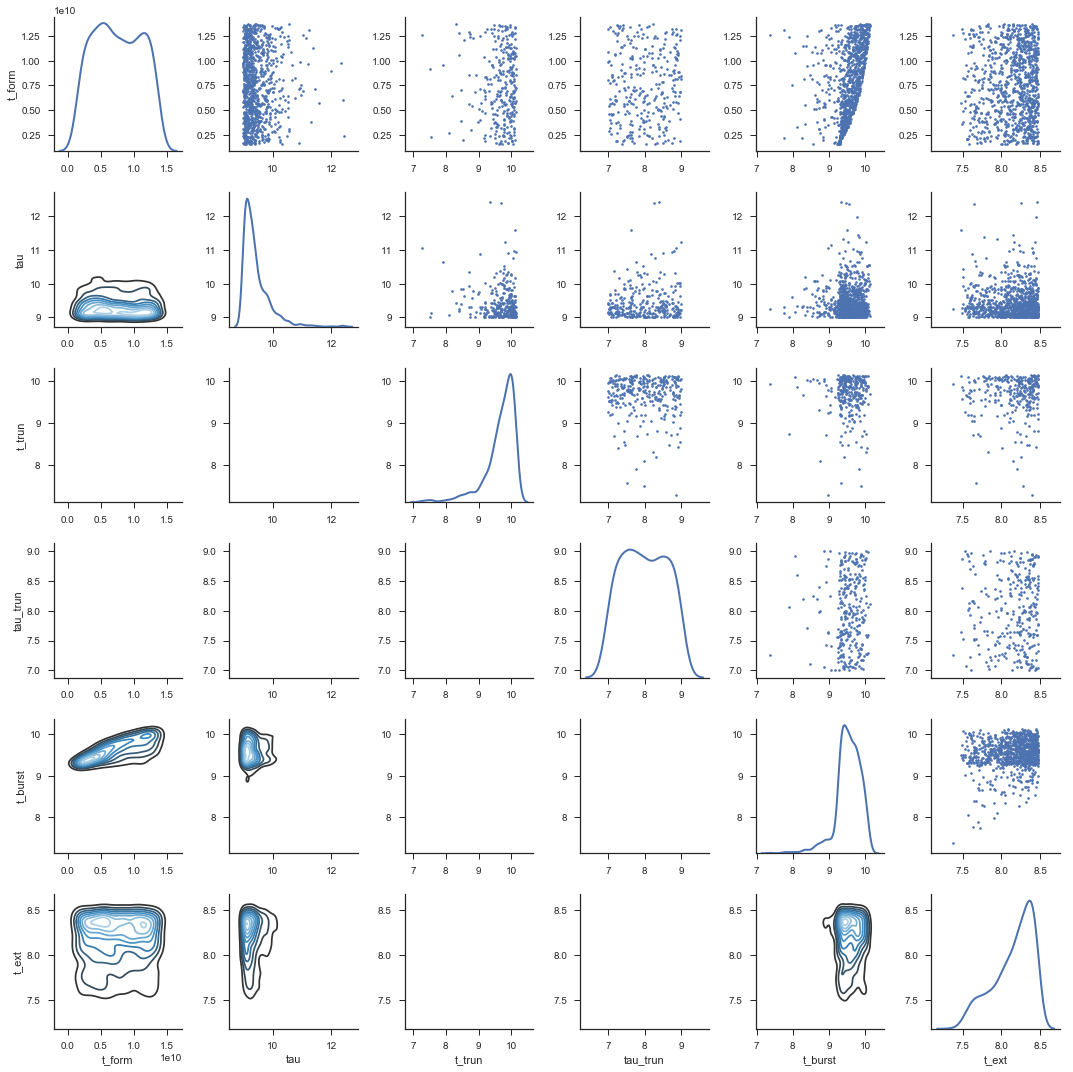

In [4]:
g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)

g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": "scott"})
g.map_diag(sns.kdeplot, lw=2, legend=False)